# **Homework 6 - Visualize Treasury Yield Curve Rates**

## Question 0 - Install dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns

sns.set_theme(style="whitegrid")

## Question 1 - Data preparation
Download October 2023 Daily Treasury Par Yield Curve Rates as a CSV file and load into a dataframe

In [2]:
yld_rts = pd.read_csv('daily-treasury-rates.csv',
                      parse_dates=['Date'], index_col='Date')
print(yld_rts.head())

            1 Mo  2 Mo  3 Mo  4 Mo  6 Mo  1 Yr  2 Yr  3 Yr  5 Yr  7 Yr  10 Yr  \
Date                                                                            
2023-10-31  5.56  5.57  5.59  5.61  5.54  5.44  5.07  4.90  4.82  4.89   4.88   
2023-10-30  5.56  5.57  5.60  5.61  5.53  5.41  5.03  4.87  4.80  4.88   4.88   
2023-10-27  5.57  5.57  5.59  5.60  5.55  5.39  4.99  4.84  4.76  4.83   4.84   
2023-10-26  5.57  5.57  5.59  5.60  5.55  5.39  5.02  4.89  4.79  4.86   4.86   
2023-10-25  5.56  5.57  5.59  5.61  5.57  5.43  5.08  4.98  4.89  4.98   4.95   

            20 Yr  30 Yr  
Date                      
2023-10-31   5.21   5.04  
2023-10-30   5.21   5.04  
2023-10-27   5.19   5.03  
2023-10-26   5.19   5.01  
2023-10-25   5.27   5.09  


## Question 2 - Line graph
Plot all maturity curves on one graph

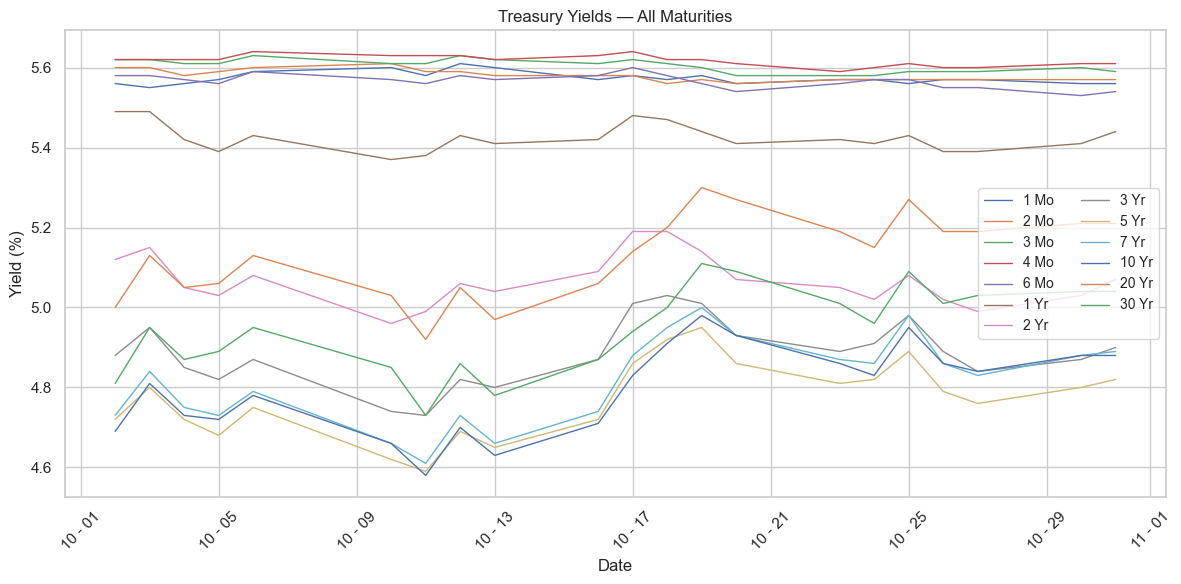

In [8]:
plt.figure(figsize=(12,6))
for col in yld_rts.columns:
    plt.plot(yld_rts.index, yld_rts[col], label=col, linewidth=1)
plt.legend(loc='best', fontsize='small', ncol=2)
plt.xlabel('Date')
from matplotlib.dates import DateFormatter

# ...existing code...

# Add this after creating the plot but before plt.show()
plt.gca().xaxis.set_major_formatter(DateFormatter('%m - %d'))

# Optionally, rotate the labels for better readability
plt.xticks(rotation=45)
plt.ylabel('Yield (%)')
plt.title('Treasury Yields — All Maturities')
plt.tight_layout()
plt.show()

## Question 3 - Pairplot
Pairplot all short rates (less than one year maturity)

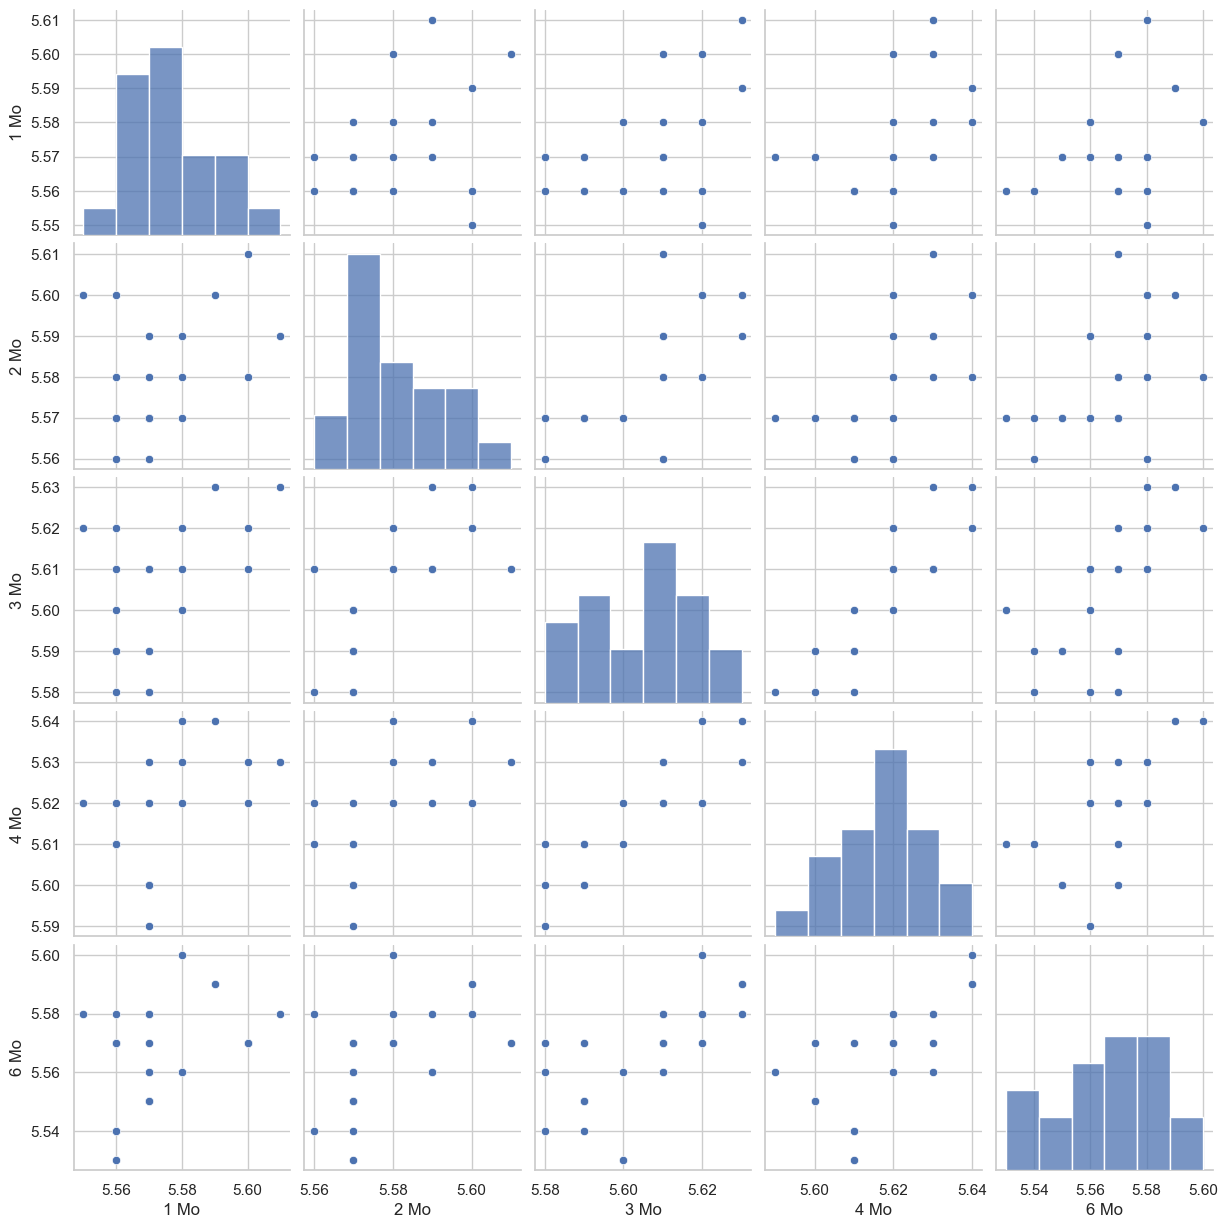

In [11]:
t_bill_cols = ['1 Mo','2 Mo','3 Mo','4 Mo','6 Mo']
t_bills_pair = yld_rts[t_bill_cols]
sns.pairplot(t_bills_pair)



## Question 4 - Scatterplot
Scatterplot a linear regression line for 2 Mo and 3 Mo curve rates

<Axes: xlabel='3 Mo', ylabel='2 Mo'>

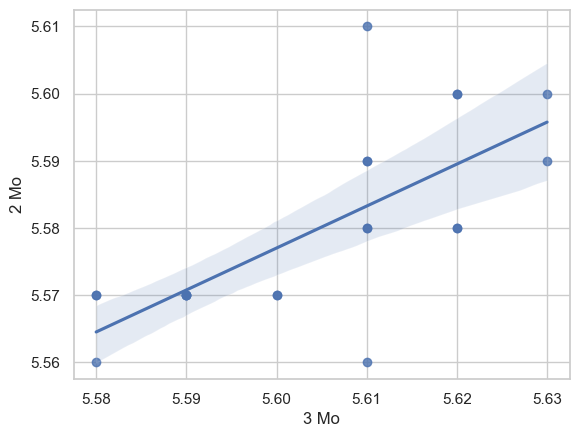

In [15]:
rates23 = yld_rts[['2 Mo', '3 Mo']]
sns.regplot(x='3 Mo', y='2 Mo', data=rates23)

## Question 5 - Jointplot
"kde" jointplot 2 Mo and 3 Mo rates

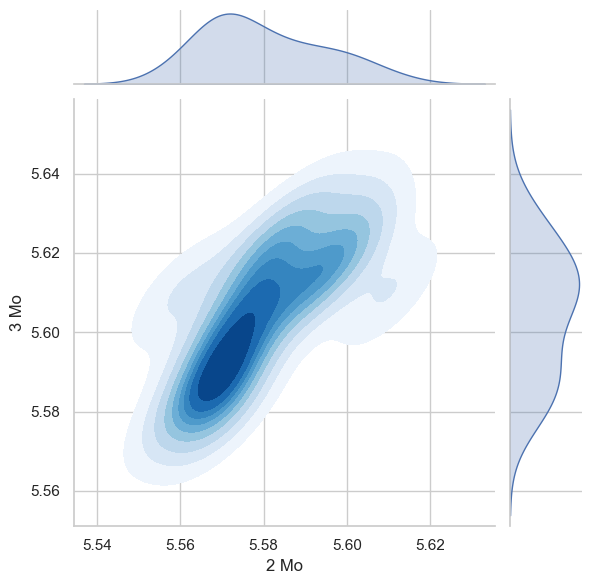

In [17]:
sns.jointplot(x='2 Mo', y='3 Mo',
              data=rates23, kind='kde',
              fill=True, cmap='Blues')

## Question 6 - Box plot
Box plot all columns

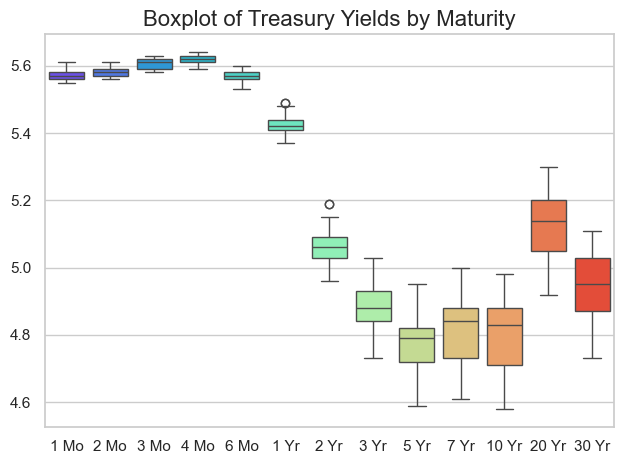

In [22]:
df_melt = yld_rts.reset_index().melt(id_vars='Date', var_name='Maturity', value_name='Yield').dropna()
# plt.figure(figsize=(12,6))
sns.boxplot(x='Maturity', y='Yield', data=df_melt, hue='Maturity', palette='rainbow', legend=False)
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('')
plt.title('Boxplot of Treasury Yields by Maturity', fontsize=16)
plt.tight_layout()
plt.show()